# Simple linear regression with curve fitting (synthetic data)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.random.seed(73)

In [4]:
def f_linear(x):
    noise = np.random.normal(0, 0.1, x.shape)
    return x + noise

In [5]:
x_linear = np.linspace(0, 1, 50)
y_linear = f_linear(x_linear)

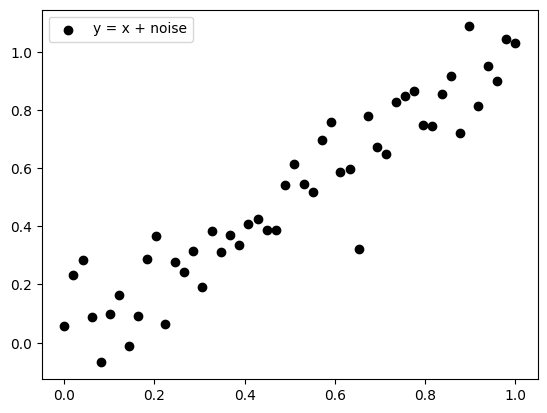

In [6]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.legend()

## Linear regression from scratch

### Deriving least square formula

#### Model

$f(x) = mx_i + b = \hat{y}$

$m$: slope \
$b$: intercept (bias)

#### Loss function

$L_i = y_i - \hat{y_i} = y_i - (mx_i + b)$   : error for each sample

$L$ = $\sum L_i^2 = \sum (y_i - (mx_i + b))^2$ : sum of squared errors

#### Minimizing loss (error) function

$\frac{\partial L}{\partial m} = 0$

$\frac{\partial L}{\partial b} = 0$

$m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$

$b = \bar{y} - m\bar{x}$

$\bar{x}$: mean of x \
$\bar{y}$: mean of y

#### R-squared

A score that indicates how well the model fits the data

$R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}$

If $R^2=1$ the model fits the data perfectly, and if $R^2=0$ the model makes as many errors as the mean of the data.

In [7]:
def fit_linear_scratch(x, y):
    """
    Fit a linear model, y = ax + b, by minimizing the sum of squared errors.
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_diff = y - y_mean
    m = np.sum(x_diff * y_diff) / np.sum(x_diff ** 2)
    b = y_mean - m * x_mean
    u = np.sum((y - (m * x + b)) ** 2)
    v = np.sum((y - y_mean) ** 2)
    R_squared = 1 - u / v
    return m, b, R_squared

In [8]:
m, b, R_squared = fit_linear_scratch(x_linear, y_linear)
m, b, R_squared = np.round(m, 4), np.round(b, 4), np.round(R_squared, 4)
print('m:', m)
print('b:', b)
print('R-squared:', R_squared)

m: 0.9711
b: 0.0207
R-squared: 0.8806


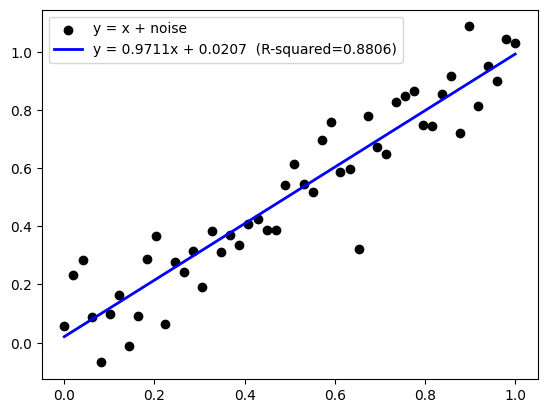

In [9]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.plot(x_linear, m * x_linear + b, label=f'y = {m}x + {b}  (R-squared={R_squared})', c='b', lw=2)
plt.legend()

## Scikit-learn

### Linear regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
x_linear_reshaped = x_linear.reshape(-1, 1)

In [13]:
model1 = LinearRegression()
estimator1 = model1.fit(x_linear_reshaped, y_linear)
R_squared1 = estimator1.score(x_linear_reshaped, y_linear)
m1, b1 = estimator1.coef_[0], estimator1.intercept_
m1, b1, R_squared1 = np.round(m1, 4), np.round(b1, 4), np.round(R_squared1, 4)
print('m1:', m1)
print('b1:', b1)
print('R-squared1:', R_squared1)

m1: 0.9711
b1: 0.0207
R-squared1: 0.8806


### Lasso

In [14]:
from sklearn.linear_model import Lasso

In [15]:
model2 = Lasso(alpha=0.01)
estimator2 = model2.fit(x_linear_reshaped, y_linear)
R_squared2 = estimator2.score(x_linear_reshaped, y_linear)
m2, b2 = estimator2.coef_[0], estimator2.intercept_
m2, b2, R_squared2 = np.round(m2, 4), np.round(b2, 4), np.round(R_squared2, 4)
print('m2:', m2)
print('b2:', b2)
print('R-squared2:', R_squared2)

m2: 0.8558
b2: 0.0784
R-squared2: 0.8682


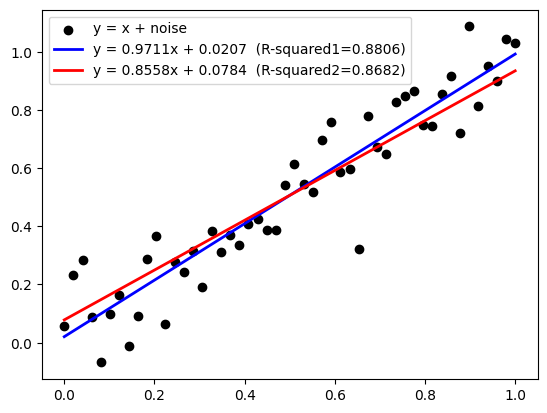

In [16]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.plot(x_linear, m1 * x_linear + b1, label=f'y = {m1}x + {b1}  (R-squared1={R_squared1})', c='b', lw=2)
plt.plot(x_linear, m2 * x_linear + b2, label=f'y = {m2}x + {b2}  (R-squared2={R_squared2})', c='r', lw=2)
plt.legend()

### Ridge

In [17]:
from sklearn.linear_model import Ridge

In [18]:
model3 = Ridge()
estimator3 = model3.fit(x_linear_reshaped, y_linear)
R_squared3 = estimator3.score(x_linear_reshaped, y_linear)
m3, b3 = estimator3.coef_[0], estimator3.intercept_
m3, b3, R_squared3 = np.round(m3, 4), np.round(b3, 4), np.round(R_squared3, 4)
print('m3:', m3)
print('b3:', b3)
print('R-squared3:', R_squared3)

m3: 0.7891
b3: 0.1117
R-squared3: 0.8497


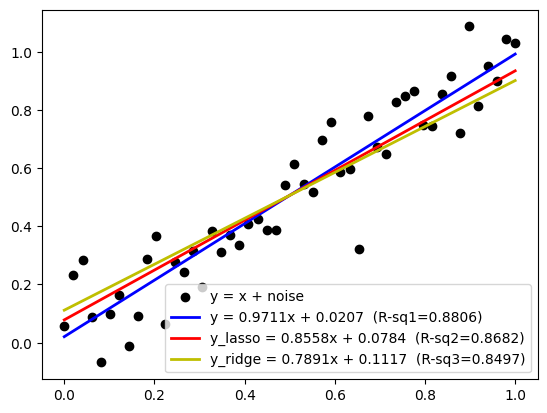

In [19]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.plot(x_linear, m1 * x_linear + b1, label=f'y = {m1}x + {b1}  (R-sq1={R_squared1})', c='b', lw=2)
plt.plot(x_linear, m2 * x_linear + b2, label=f'y_lasso = {m2}x + {b2}  (R-sq2={R_squared2})', c='r', lw=2)
plt.plot(x_linear, m3 * x_linear + b3, label=f'y_ridge = {m3}x + {b3}  (R-sq3={R_squared3})', c='y', lw=2)
plt.legend()

## Non-linear regression

In [20]:
def f_polynomial(x):
    noise = np.random.normal(0, 0.1, x.shape)
    return x ** 2 + 2 * x + 1 + noise

In [21]:
x_poly = np.linspace(-3, 1, 50)
y_poly = f_polynomial(x_poly)

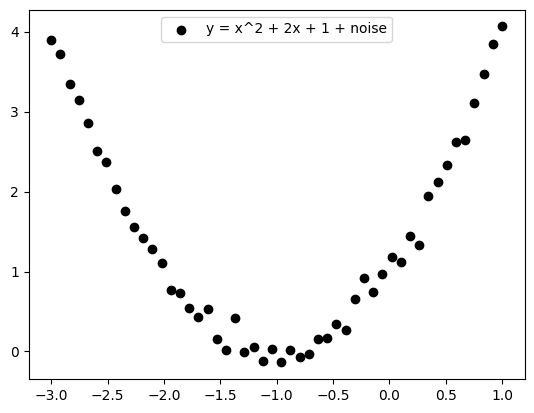

In [22]:
plt.scatter(x_poly, y_poly, label='y = x^2 + 2x + 1 + noise', c='k')
plt.legend()

### Unsuitable model for non-linear data

In [23]:
model_ = LinearRegression()
estimator_ = model_.fit(x_poly.reshape(-1, 1), y_poly)
y_poly_pred = estimator_.predict(x_poly.reshape(-1, 1))
R_squared_ = estimator_.score(x_poly.reshape(-1, 1), y_poly)
print(f'R-squared of linear model: {R_squared_:.4f}')

R-squared of linear model: 0.0002


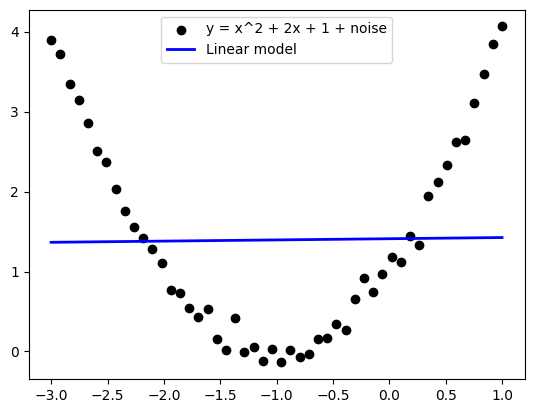

In [24]:
plt.scatter(x_poly, y_poly, label='y = x^2 + 2x + 1 + noise', c='k')
plt.plot(x_poly, y_poly_pred, label='Linear model', c='b', lw=2)
plt.legend()

### Polynomial regression

* Polynomial features are used to fit a non-linear model to the data
* `PolynomialFeatures` transforms the input data, $x$, into a polynomial form
* In other words, it generates new features by raising the existing features to a power
* For example:

    $(x) \rightarrow (1, x, x^2)$

    $(x_1, x_2) \rightarrow (1, x_1, x_2, x_1^2, x_1x_2, x_2^2)$

* This is similar to **kernel trick**. It transforms the input data into a higher dimension to make it linearly separable.
* But kernel trick computes the transformation into higher dimension implicitly, while polynomial features do it explicitly.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
x_poly_reshaped = x_poly.reshape(-1, 1)
x_poly_features = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_poly_reshaped)

In [27]:
model_poly1 = LinearRegression(fit_intercept=True)
estimator_poly1 = model_poly1.fit(x_poly_features, y_poly)
R_squared_poly1 = estimator_poly1.score(x_poly_features, y_poly)
b_poly1 = estimator_poly1.intercept_
print('Coefficients:')
for coef in estimator_poly1.coef_:
    print(f'\t{coef:.4f}')
print(f'bias: {b_poly1:.4f}')
print(f'R-squared: {R_squared_poly1:.4f}')

Coefficients:
	2.0417
	1.0134
bias: 1.0173
R-squared: 0.9923


In [28]:
y_poly_pred1 = model_poly1.predict(x_poly_features)
## y_poly_pred1 = c2 * x_poly ** 2 + c1 * x_poly + b_poly1


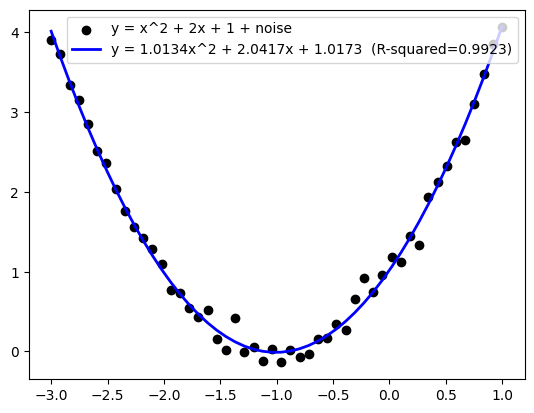

In [29]:
c1, c2 = estimator_poly1.coef_
c1, c2, b_poly1, R_squared_poly1 = np.round(c1, 4), np.round(c2, 4), np.round(b_poly1, 4), np.round(R_squared_poly1, 4)
plt.scatter(x_poly, y_poly, label='y = x^2 + 2x + 1 + noise', c='k')
plt.plot(x_poly, y_poly_pred1, label=f'y = {c2}x^2 + {c1}x + {b_poly1}  (R-squared={R_squared_poly1})', c='b', lw=2)
plt.legend()

### Predicting without using squared term in the features

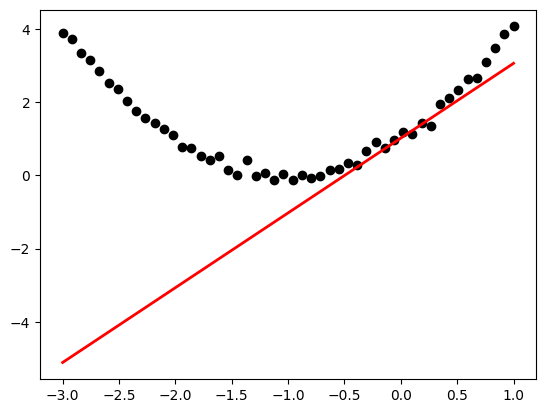

In [30]:
x_poly_features_simple = x_poly_features * [1, 0]  # Zero-out the x^2 coefficient of features
y_poly_pred1_simple = model_poly1.predict(x_poly_features_simple)

plt.scatter(x_poly, y_poly, label='y = x^2 + 2x + 1 + noise', c='k')
plt.plot(x_poly, y_poly_pred1_simple, c='r', lw=2)

### High-degree polynomial regression

In [31]:
def f_polynomial5(x):
    noise = np.random.normal(0, 1, x.shape)
    return 2 * x ** 5 - 5 * x ** 4 - 10 * x ** 3 + 20 * x ** 2 + 8 * x -3 + noise

In [32]:
x_poly5 = np.linspace(-2, 2, 200)
y_poly5 = f_polynomial5(x_poly5)

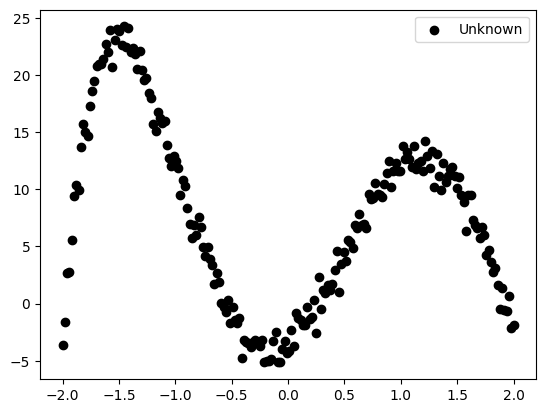

In [33]:
plt.scatter(x_poly5, y_poly5, label='Unknown', c='k')
plt.legend()

In [34]:
def fit_polynomial(x, y, degree):
    x_poly_reshaped = x.reshape(-1, 1)
    x_poly_features = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(x_poly_reshaped)
    model_poly = LinearRegression(fit_intercept=True)
    estimator_poly = model_poly.fit(x_poly_features, y)
    R_squared_poly = estimator_poly.score(x_poly_features, y)
    b_poly = estimator_poly.intercept_
    y_poly_pred = model_poly.predict(x_poly_features)

    print(f'Polynomial of degree {degree}')
    print('\tCoefficients:')
    for coef in estimator_poly.coef_:
        print(f'\t\t{coef:.4f}')
    print(f'\t\tbias: {b_poly:.4f}')
    print(f'\t\tR-squared: {R_squared_poly:.4f}')

    return estimator_poly, b_poly, R_squared_poly, y_poly_pred

In [35]:
estimator_poly2, b_poly2, R_squared_poly2, y_poly_pred2 = fit_polynomial(x_poly5, y_poly5, degree=2)
estimator_poly3, b_poly3, R_squared_poly3, y_poly_pred3 = fit_polynomial(x_poly5, y_poly5, degree=3)
estimator_poly4, b_poly4, R_squared_poly4, y_poly_pred4 = fit_polynomial(x_poly5, y_poly5, degree=4)
estimator_poly5, b_poly5, R_squared_poly5, y_poly_pred5 = fit_polynomial(x_poly5, y_poly5, degree=5)
estimator_poly6, b_poly6, R_squared_poly6, y_poly_pred6 = fit_polynomial(x_poly5, y_poly5, degree=6)

Polynomial of degree 2
	Coefficients:
		-2.1500
		2.7880
		bias: 3.8273
		R-squared: 0.2693
Polynomial of degree 3
	Coefficients:
		0.1534
		2.7880
		-0.9502
		bias: 3.8273
		R-squared: 0.2903
Polynomial of degree 4
	Coefficients:
		0.1534
		20.1405
		-0.9502
		-5.0112
		bias: -3.1827
		R-squared: 0.8876
Polynomial of degree 5
	Coefficients:
		7.9675
		20.1405
		-9.9777
		-5.0112
		2.0113
		bias: -3.1827
		R-squared: 0.9858
Polynomial of degree 6
	Coefficients:
		7.9675
		20.6169
		-9.9777
		-5.3650
		2.0113
		0.0642
		bias: -3.2743
		R-squared: 0.9859


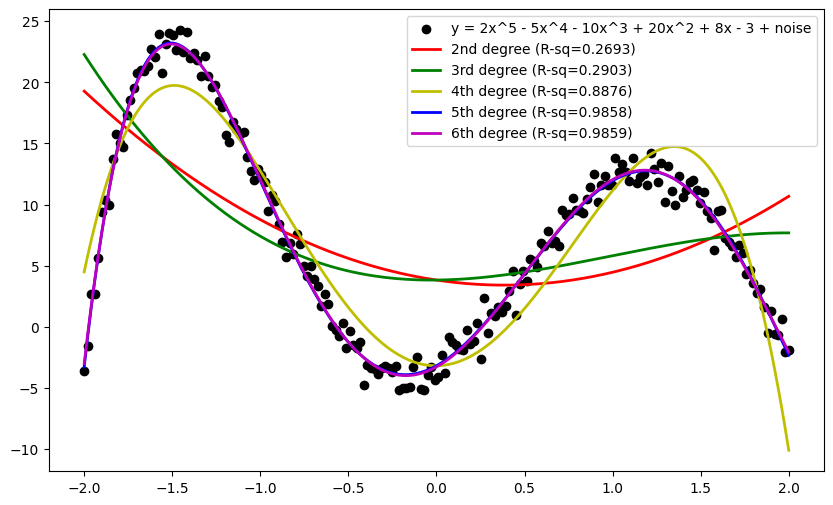

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(x_poly5, y_poly5, label='y = 2x^5 - 5x^4 - 10x^3 + 20x^2 + 8x - 3 + noise', c='k')
plt.plot(x_poly5, y_poly_pred2, label=f'2nd degree (R-sq={R_squared_poly2:.4f})', c='r', lw=2)
plt.plot(x_poly5, y_poly_pred3, label=f'3rd degree (R-sq={R_squared_poly3:.4f})', c='g', lw=2)
plt.plot(x_poly5, y_poly_pred4, label=f'4th degree (R-sq={R_squared_poly4:.4f})', c='y', lw=2)
plt.plot(x_poly5, y_poly_pred5, label=f'5th degree (R-sq={R_squared_poly5:.4f})', c='b', lw=2)
plt.plot(x_poly5, y_poly_pred6, label=f'6th degree (R-sq={R_squared_poly6:.4f})', c='m', lw=2)
plt.legend()

### Support Vector Regression (SVR)

Support Vector Machines (SVMs) are powerful supervised learning models used for both classification and regression tasks.
They are particularly well-suited for binary classification problems.

* A *hyperplane* is a decision boundary that separates the data points of different classes in the feature space.
* For a two-dimensional space, a hyperplane is a line; for a three-dimensional space, it is a plane; and for higher dimensions, it is a hyperplane.
* The *margin* is the distance between the hyperplane and the closest data points from either class.
* SVM aims to find the hyperplane that maximizes this margin.
* Support Vectors are data points that are closest to the hyperplane and are used to define the margin.
* These points are critical in determining the position and orientation of the hyperplane.
* Linear SVM is used when the data is linearly separable, meaning a straight line (or hyperplane) can separate the classes.
* The goal is to find the hyperplane that maximizes the margin between the classes.
* Non-Linear SVM is used when the data is not linearly separable.
* Uses the **kernel trick** to transform the data into a higher-dimensional space where a linear hyperplane can be used to separate the classes.
* Linear Kernel: Used when the data is linearly separable.
* Polynomial Kernel: Transforms the data into a higher-degree polynomial space.
* Radial Basis Function (RBF) Kernel: Maps the data into an infinite-dimensional space.
    * Suitable for complex datasets where the decision boundary is highly non-linear.
* Sigmoid Kernel: Similar to the neural network activation function.
* Hard Margin SVM
    * Requires that all data points are perfectly separated by the hyperplane.
    * Only works when the data is completely linearly separable.
    * Sensitive to outliers.
* Soft Margin SVM
    * Allows some misclassifications to achieve better generalization.
    * Introduces a regularization parameter $C$ that controls the trade-off between maximizing the margin and minimizing the classification error.
    * More robust to noise and outliers.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

`StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.

This is important for SVMs because they are sensitive to the scale of the input features.

In [292]:
x_poly5_reshaped = x_poly5.reshape(-1, 1)
model_svr = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=5, C=100, epsilon=0.1, coef0=1))
estimator_svr = model_svr.fit(x_poly5_reshaped, y_poly5)
y_poly5_pred_svr = estimator_svr.predict(x_poly5_reshaped)
R_squared_svr = estimator_svr.score(x_poly5_reshaped, y_poly5)
print(f'R-squared of SVR: {R_squared_svr:.4f}')

R-squared of SVR: 0.9821


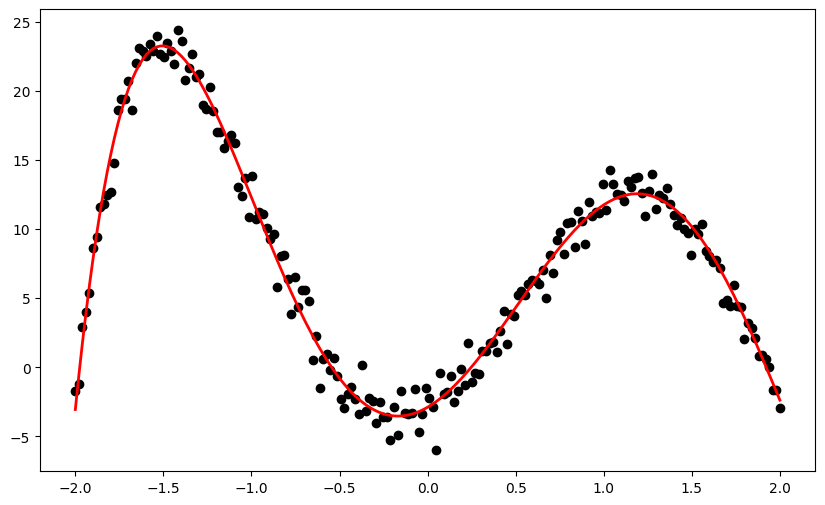

In [293]:
plt.figure(figsize=(10, 6))
plt.scatter(x_poly5, y_poly5, label='y = 2x^5 - 5x^4 - 10x^3 + 20x^2 + 8x - 3 + noise', c='k')
plt.plot(x_poly5, y_poly5_pred_svr, label=f'SVR (R-sq={R_squared_svr:.4f})', c='r', lw=2)